In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('patanjali.csv')
print('Dataset :',data.shape)

Dataset : (62, 18)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              62 non-null     int64
 1   Gender           62 non-null     int64
 2   Location         62 non-null     int64
 3   Popularity       62 non-null     int64
 4   Discussed        62 non-null     int64
 5   Availability     62 non-null     int64
 6   Visibility       62 non-null     int64
 7   Quality          62 non-null     int64
 8   Affordable       62 non-null     int64
 9   Purity           62 non-null     int64
 10  Benchmarking     62 non-null     int64
 11  Recipe           62 non-null     int64
 12  Variety          62 non-null     int64
 13  Competitiveness  62 non-null     int64
 14  Promotion        62 non-null     int64
 15  Awareness        62 non-null     int64
 16  Price            62 non-null     int64
 17  Purchased        62 non-null     int64
dtypes: int64(18)

In [5]:
data

,Age,Gender,Location,Popularity,Discussed,Availability,Visibility,Quality,Affordable,Purity,Benchmarking,Recipe,Variety,Competitiveness,Promotion,Awareness,Price,Purchased
0,26,1,1,3,3,4,4,3,3,3,4,4,4,3,3,3,3,1
1,2,1,1,3,4,3,5,3,3,4,3,2,5,5,2,4,3,1
2,24,1,1,4,4,5,2,2,4,4,4,4,4,4,5,4,4,0
3,22,1,1,3,2,4,3,1,2,2,3,2,3,2,2,2,4,0
4,24,1,1,3,2,2,2,3,3,3,2,4,3,2,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,24,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
58,23,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
59,25,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1
60,23,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,1


In [6]:
sns.set_style("whitegrid")

C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\INDIA\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


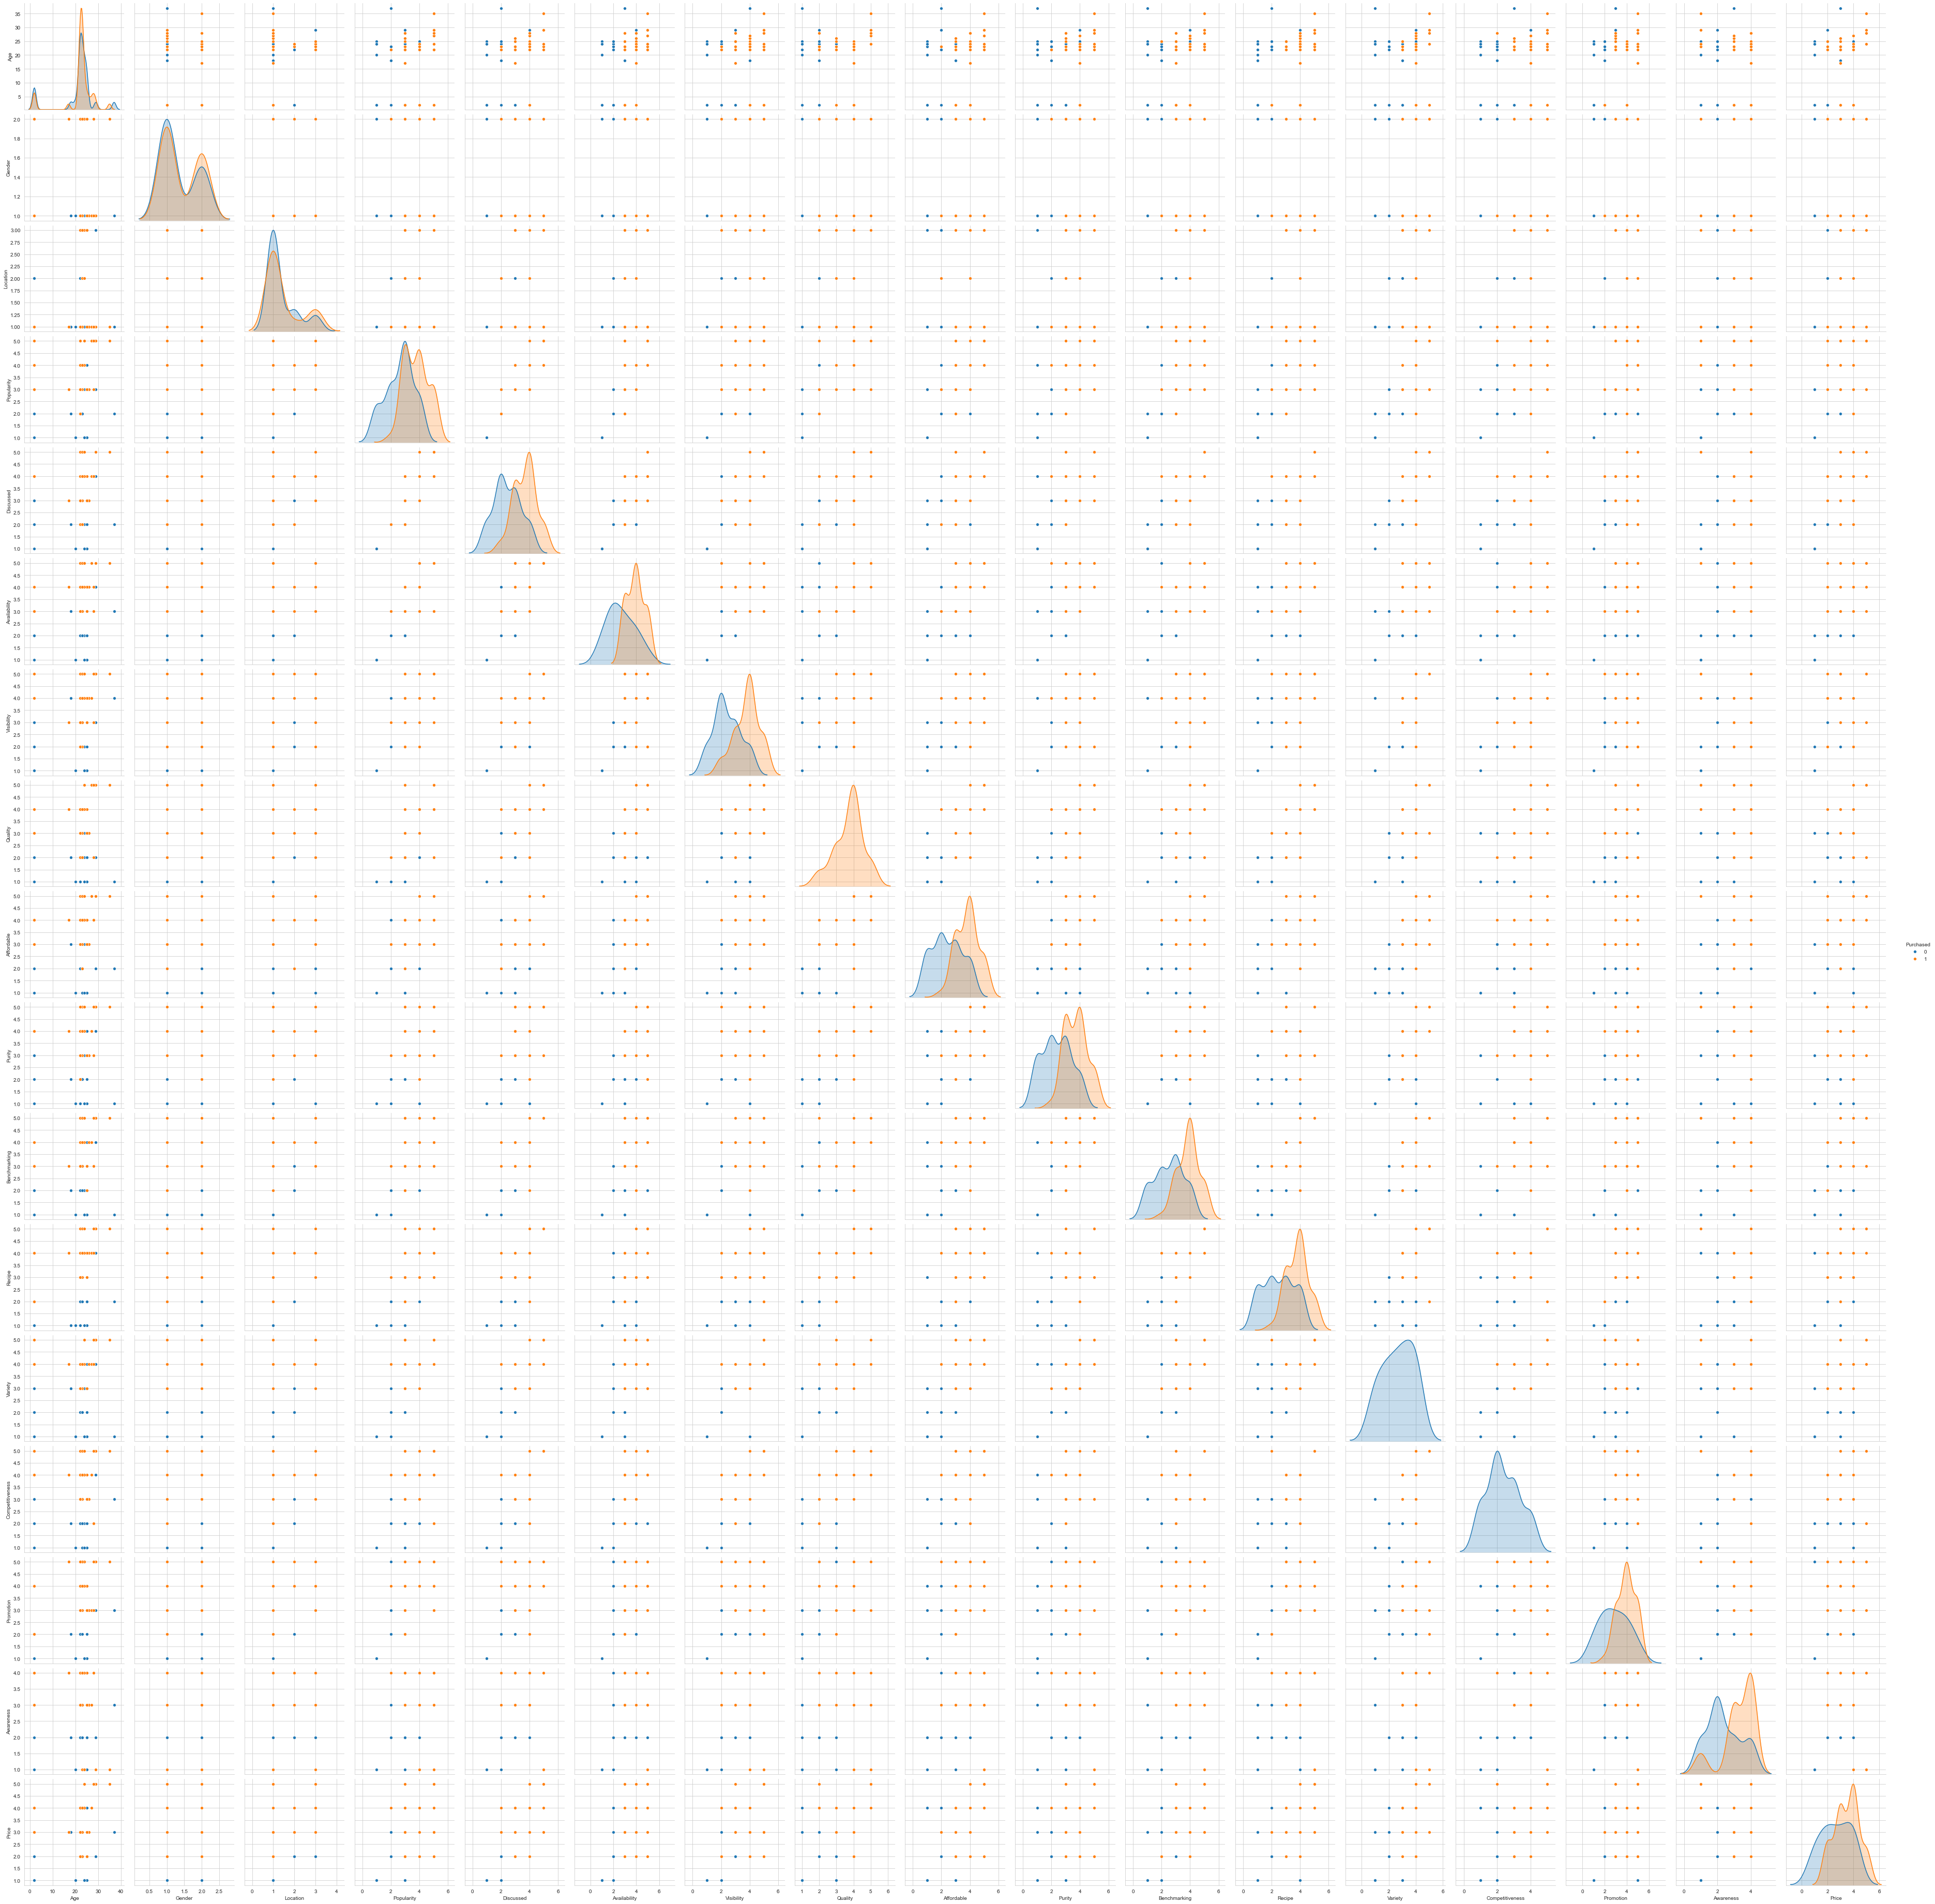

In [22]:
sns.pairplot(data,hue="Purchased",size=3);
plt.show()

In [8]:
data = data[['Age','Gender','Location','Popularity','Discussed','Availability','Visibility','Quality','Affordable','Purity','Benchmarking','Recipe','Variety','Competitiveness','Promotion','Awareness','Price','Purchased']] 

In [9]:
cor = data.corr()

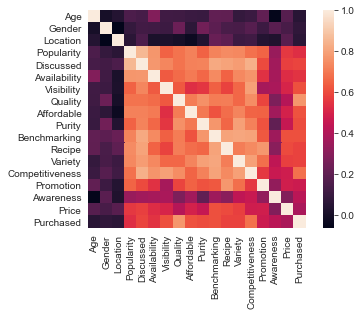

In [10]:
sns.heatmap(cor, square = True)

In [12]:
from sklearn.model_selection import train_test_split
Y = data['Purchased']
X = data.drop(columns=['Purchased'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [13]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (55, 17)
Y train shape:  (55,)
X test shape:  (7, 17)
Y test shape:  (7,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [15]:
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

In [16]:
rfcla.fit(X_train, Y_train)

RandomForestClassifier(n_jobs=-1, random_state=9)

In [17]:
Y_predict5 = rfcla.predict(X_test)

In [18]:
test_acc_rfcla = round(rfcla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_rfcla = round(rfcla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

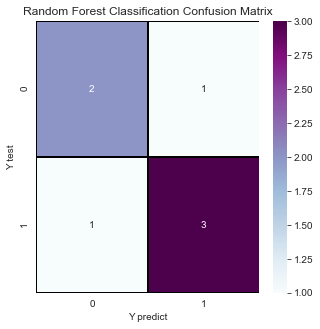

In [19]:
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [20]:
model1 = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train Score': [train_acc_rfcla],
    'Test Score': [test_acc_rfcla]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,Random Forest,100.0,71.43


In [21]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict5)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

Average precision-recall score: 0.71


NameError: name 'train_data' is not defined